In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config

,N,project_id,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,geometry
0,62317,134,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4..."
1,62317,134,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4..."
2,62317,134,Crossroads,City Center,2504,146.410140,49,82.317025,0.020341,"POLYGON ((422640.942 4469115.927, 422641.047 4..."
3,62317,134,Crossroads,City Center,2505,76.823967,49,167718.011467,41.444023,"POLYGON ((422654.105 4469147.185, 422649.306 4..."
4,62317,134,Crossroads,City Center,2498,112.631810,49,268457.440292,66.337278,"POLYGON ((421588.154 4469911.650, 421669.151 4..."
...,...,...,...,...,...,...,...,...,...,...
1242,24228,64,Meadowbrook Station,City Center,1492,45.728115,35,149005.282516,36.820007,"POLYGON ((424235.616 4505014.079, 424269.116 4..."
1243,24228,64,Meadowbrook Station,City Center,1493,50.633831,35,109626.735660,27.089356,"MULTIPOLYGON (((424462.516 4504848.479, 424705..."
1244,24256,64,Meadowbrook Station,City Center,1494,50.381448,35,108708.827297,26.862536,"POLYGON ((424715.708 4504846.582, 424945.987 4..."
1245,24281,64,Meadowbrook Station,City Center,1495,88.369280,35,93800.997173,23.178731,"POLYGON ((424961.771 4504845.920, 424963.041 4..."


<AxesSubplot:>

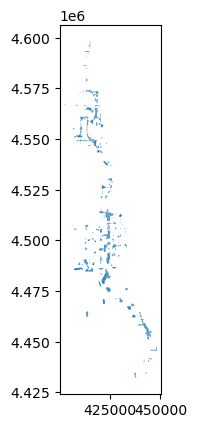

In [2]:
centers_taz_with_nearest_stop_gdf = gpd.read_file('intermediate/centers-taz-with-nearest-stop.geojson')
display(centers_taz_with_nearest_stop_gdf)
centers_taz_with_nearest_stop_gdf.plot()

In [3]:
taz_list = centers_taz_with_nearest_stop_gdf['TAZID'].drop_duplicates()
taz_list

0       2496
1       2503
2       2504
3       2505
4       2498
        ... 
1242    1492
1243    1493
1244    1494
1245    1495
1246    1536
Name: TAZID, Length: 1145, dtype: int64

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4..."
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4..."
2,0,3.0,0.0,867.0,0.0,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((421778.186 4524869.076, 421778.184 4..."
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4..."
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4..."
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4..."
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4..."
712234,0,766664.0,0.0,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423121.651 4483703.060, 423133.545 4..."


<AxesSubplot:>

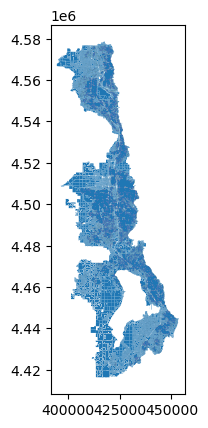

In [4]:
gdf_future_land_use_2050 = gpd.read_file("input/from-josh/future_land_use_2023_2050/future_land_use_2050.shp")
display(gdf_future_land_use_2050)
gdf_future_land_use_2050.plot()

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4..."
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4..."
2,0,3.0,0.0,867.0,0.0,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((421778.186 4524869.076, 421778.184 4..."
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4..."
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4..."
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4..."
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4..."
712234,0,766664.0,0.0,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423121.651 4483703.060, 423133.545 4..."


<AxesSubplot:>

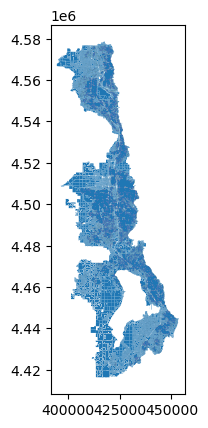

In [5]:
gdf_future_land_use_2023 = gpd.read_file("input/from-josh/future_land_use_2023_2050/future_land_use_2023.shp")
display(gdf_future_land_use_2023)
gdf_future_land_use_2023.plot()

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,...,no_build,geometry,sqmf,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch,HH,EMP
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4...",1251.309576,0.309205,changeable,0.000000,0.0,0.309205,True,True
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4...",25971.284449,6.417644,no_build,6.417644,0.0,0.000000,False,False
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,...,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4...",4296.110445,1.061592,changeable,0.000000,0.0,1.061592,False,True
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4...",4568.716190,1.128954,changeable,0.000000,0.0,1.128954,True,True
6,0,7.0,0.0,756.0,0.0,0.5,0.0,0.0,1.0,0.0,...,0.0,"POLYGON ((420273.975 4542582.973, 420319.645 4...",30226.635185,7.469164,changeable,0.000000,0.0,7.469164,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712230,0,766661.0,0.0,2138.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((422456.533 4483123.383, 422457.800 4...",716724.279491,177.106427,changeable,0.000000,0.0,177.106427,False,False
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4...",681233.696496,168.336513,changeable,0.000000,0.0,168.336513,False,False
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4...",128050.560835,31.641983,changeable,0.000000,0.0,31.641983,True,True
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4...",412557.123630,101.945085,changeable,0.000000,0.0,101.945085,False,False


<AxesSubplot:>

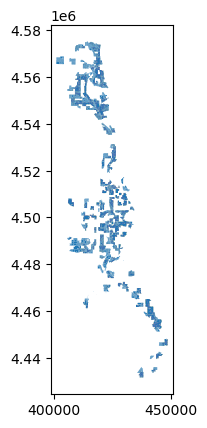

In [6]:
gdf_future_land_use_2050_filtered = gdf_future_land_use_2050[gdf_future_land_use_2050['TAZID_900'].isin(taz_list)].copy()

# Calculate the area in square meters
gdf_future_land_use_2050_filtered['sqmf'] = gdf_future_land_use_2050_filtered.geometry.area

gdf_future_land_use_2050_filtered['acresf'] = gdf_future_land_use_2050_filtered['sqmf'] / 4046.85642

# Define the conditions
condition_HH = (gdf_future_land_use_2050_filtered['sf'] + gdf_future_land_use_2050_filtered['mf']) >= 1
condition_EMP = gdf_future_land_use_2050_filtered[['ind', 'retail', 'office', 'govt', 'mixed', 'other']].sum(axis=1) > 0

# Define the condition for no build

# Define the condition - SF =1 and others =0
condition_no_change = _config.get_condition_no_change(gdf_future_land_use_2050_filtered)
condition_no_build = _config.condition_no_build(gdf_future_land_use_2050_filtered, 'TAZID_900')

# Calculate the area and assign it to the new column
gdf_future_land_use_2050_filtered['dev_status'] = np.where(
    condition_no_build, 'no_build', 
    np.where(condition_no_change, 'no_change', 'changeable')
)

gdf_future_land_use_2050_filtered['acresf_nb'] = np.where(condition_no_build                        , gdf_future_land_use_2050_filtered['acresf'], 0)
gdf_future_land_use_2050_filtered['acresf_nc'] = np.where(condition_no_change                       , gdf_future_land_use_2050_filtered['acresf'], 0)
gdf_future_land_use_2050_filtered['acresf_ch'] = np.where(~condition_no_build & ~condition_no_change, gdf_future_land_use_2050_filtered['acresf'], 0)

# Check if condition is met and assign boolean values
gdf_future_land_use_2050_filtered['HH'] = condition_HH
gdf_future_land_use_2050_filtered['EMP'] = condition_EMP

display(gdf_future_land_use_2050_filtered)
gdf_future_land_use_2050_filtered.plot()

In [7]:
gdf_future_land_use_2050_filtered[gdf_future_land_use_2050_filtered['TAZID_900']==669]

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,...,no_build,geometry,sqmf,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch,HH,EMP
263,0,265.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((410637.004 4551111.898, 410637.006 4...",3419.631141,0.845009,no_build,0.845009,0.0,0.000000,False,False
1040,0,1110.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411175.861 4551152.430, 411227.534 4...",197401.166753,48.778891,no_build,48.778891,0.0,0.000000,False,False
1041,0,1111.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411783.075 4550803.440, 411782.948 4...",1807.005649,0.446521,no_build,0.446521,0.0,0.000000,False,False
1042,0,1112.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411783.075 4550803.440, 411782.948 4...",6535.061685,1.614849,no_build,1.614849,0.0,0.000000,False,False
1043,0,1113.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411675.232 4551551.256, 411676.068 4...",66151.557288,16.346406,no_build,16.346406,0.0,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659366,0,712981.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((410904.248 4551556.253, 410995.848 4...",22006.152418,5.437839,changeable,0.000000,0.0,5.437839,True,True
659367,0,712982.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((410995.848 4551315.483, 410995.848 4...",22006.140414,5.437836,changeable,0.000000,0.0,5.437836,True,True
659368,0,712983.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((410995.848 4551435.391, 410995.848 4...",22006.148334,5.437838,changeable,0.000000,0.0,5.437838,True,True
660304,0,713925.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((411175.861 4551152.430, 411180.607 4...",37915.237559,9.369059,changeable,0.000000,0.0,9.369059,True,True


# Calculate Percent Changeable

In [8]:
gdf_future_land_use_2023_filtered = gdf_future_land_use_2023[gdf_future_land_use_2023['TAZID_900'].isin(taz_list)].copy()

# Calculate the area in square meters
gdf_future_land_use_2023_filtered['sqmf'] = gdf_future_land_use_2023_filtered.geometry.area

gdf_future_land_use_2023_filtered['acresf'] = gdf_future_land_use_2023_filtered['sqmf'] / 4046.85642

# Define the condition - SF =1 and others =0
condition_no_change = _config.get_condition_no_change(gdf_future_land_use_2023_filtered)
condition_no_build = _config.get_condition_no_build(gdf_future_land_use_2023_filtered, 'TAZID_900')

# Calculate the area and assign it to the new column
gdf_future_land_use_2023_filtered['dev_status'] = np.where(
    condition_no_build, 'no_build', 
    np.where(condition_no_change, 'no_change', 'changeable')
)

gdf_future_land_use_2023_filtered['acresf_nb'] = np.where(condition_no_build                        , gdf_future_land_use_2023_filtered['acresf'], 0)
gdf_future_land_use_2023_filtered['acresf_nc'] = np.where(condition_no_change                       , gdf_future_land_use_2023_filtered['acresf'], 0)
gdf_future_land_use_2023_filtered['acresf_ch'] = np.where(~condition_no_build & ~condition_no_change, gdf_future_land_use_2023_filtered['acresf'], 0)

display(gdf_future_land_use_2023_filtered)
gdf_future_land_use_2023_filtered.plot()

AttributeError: module '_config' has no attribute 'get_condition_no_build'

In [ ]:
gdf_stops_flu_23

,N,project_id,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,Id,...,no_build,sqmf,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch,geometry,sqmu,acresu
0,62317.0,134.0,Crossroads,City Center,2496.0,165.490872,49.0,306078.979084,75.633763,0.0,...,0.0,1149.217255,0.283978,changeable,0.0,0.0,0.283978,"POLYGON ((421794.158 4469153.979, 421794.184 4...",1.149217e+03,2.839778e-01
1,62317.0,134.0,Crossroads,City Center,2496.0,165.490872,49.0,306078.979084,75.633763,0.0,...,0.0,8142.745774,2.012116,changeable,0.0,0.0,2.012116,"POLYGON ((421660.106 4469167.747, 421669.963 4...",3.053886e+03,7.546317e-01
2,62317.0,134.0,Crossroads,City Center,2505.0,76.823967,49.0,167718.011467,41.444023,0.0,...,0.0,8142.745774,2.012116,changeable,0.0,0.0,2.012116,"POLYGON ((422212.202 4469434.222, 422214.197 4...",2.779906e+02,6.869298e-02
3,62317.0,134.0,Crossroads,City Center,2498.0,112.631810,49.0,268457.440292,66.337278,0.0,...,0.0,8142.745774,2.012116,changeable,0.0,0.0,2.012116,"POLYGON ((422212.077 4469257.318, 422203.170 4...",4.519210e+03,1.116721e+00
4,62317.0,134.0,Crossroads,City Center,2496.0,165.490872,49.0,306078.979084,75.633763,0.0,...,0.0,4042.371953,0.998892,changeable,0.0,0.0,0.998892,"POLYGON ((422054.184 4468654.680, 422053.917 4...",4.042372e+03,9.988919e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,20744.572653,5.126096,changeable,0.0,0.0,5.126096,"POLYGON ((421613.594 4523745.639, 421612.731 4...",1.309740e+02,3.236438e-02
235460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,681233.696496,168.336513,changeable,0.0,0.0,168.336513,"POLYGON ((423507.408 4482116.360, 423510.708 4...",3.945048e+01,9.748426e-03
235461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,128050.560835,31.641983,changeable,0.0,0.0,31.641983,"POLYGON ((424361.724 4482434.549, 424371.322 4...",1.446954e+04,3.575501e+00
235462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,412557.123630,101.945085,changeable,0.0,0.0,101.945085,"POLYGON ((423945.728 4483679.993, 423945.579 4...",1.300618e-11,3.213898e-15


In [ ]:
# Perform the intersection of the first two GeoDataFrames
gdf_stops_flu_23 = gpd.overlay(centers_taz_with_nearest_stop_gdf, gdf_future_land_use_2023_filtered, how='union')

# drop non-parcel areas from union
gdf_stops_flu_23 = gdf_stops_flu_23.dropna(subset=['parcel_id'])

# Calculate the area in square meters
gdf_stops_flu_23['sqmu'] = gdf_stops_flu_23.geometry.area

# Convert the area to acres
gdf_stops_flu_23['acresu'] = gdf_stops_flu_23['sqmu'] / 4046.85642

# Define the condition - SF =1 and others =0
condition_no_change = _config.get_condition_no_change(gdf_stops_flu_23)
condition_no_build = _config.condition_no_build(gdf_stops_flu_23, 'TAZID_900')

# Calculate the area and assign it to the new column
gdf_stops_flu_23['dev_status'] = np.where(
    condition_no_build, 'no_build', 
    np.where(condition_no_change, 'no_change', 'changeable')
)

gdf_stops_flu_23['acresu_nb'] = np.where(condition_no_build                        , gdf_stops_flu_23['acresu'], 0)
gdf_stops_flu_23['acresu_nc'] = np.where(condition_no_change                       , gdf_stops_flu_23['acresu'], 0)
gdf_stops_flu_23['acresu_ch'] = np.where(~condition_no_build & ~condition_no_change, gdf_stops_flu_23['acresu'], 0)


# fill null TAZID with value from FLU
gdf_stops_flu_23['TAZID'].fillna(gdf_stops_flu_23['TAZID_900'], inplace=True)

gdf_stops_flu_23['N'].fillna(0, inplace=True)
gdf_stops_flu_23['N'] = gdf_stops_flu_23['N'].astype(int)

# The final_intersection GeoDataFrame now contains the intersection of all three GeoDataFrames
display(gdf_stops_flu_23)
gdf_stops_flu_23.plot()

C:\Users\bhereth\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1803: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
C:\Users\bhereth\AppData\Local\Temp\ipykernel_41040\1060852596.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 286 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_stops_flu_23 = gpd.overlay(centers_taz_with_nearest_stop_gdf, gdf_future_land_use_2023_filtered, how='union')


KeyError: 'TAZ_900'

In [ ]:
import numpy as np

gdf_stops_flu_23_sum_acres = gdf_stops_flu_23.groupby(['N','project_id','TAZID'], as_index=False).agg(acresu     = ('acresu'   ,'sum'),
                                                                                                      acresu_nb  = ('acresu_nb','sum'),
                                                                                                      acresu_nc  = ('acresu_nc','sum'),
                                                                                                      acresu_ch  = ('acresu_ch','sum'))

gdf_stops_flu_23_sum_acres['pctu_nb'] = gdf_stops_flu_23_sum_acres['acresu_nb'] / gdf_stops_flu_23_sum_acres['acresu']
gdf_stops_flu_23_sum_acres['pctu_nc'] = gdf_stops_flu_23_sum_acres['acresu_nc'] / gdf_stops_flu_23_sum_acres['acresu']
gdf_stops_flu_23_sum_acres['pctu_ch'] = gdf_stops_flu_23_sum_acres['acresu_ch'] / gdf_stops_flu_23_sum_acres['acresu']

gdf_stops_flu_23_sum_acres['pctu_nb'].fillna(0, inplace=True)
gdf_stops_flu_23_sum_acres['pctu_nc'].fillna(0, inplace=True)
gdf_stops_flu_23_sum_acres['pctu_ch'].fillna(0, inplace=True)

gdf_stops_flu_23_sum_acres

,N,project_id,TAZID,acresu,acresu_nb,acresu_nc,acresu_ch,pctu_nb,pctu_nc,pctu_ch
0,10008,20.0,2117.0,113.893840,13.391000,1.960284,98.542556,0.117574,0.017212,0.865214
1,10010,20.0,1918.0,84.115611,0.100740,0.000000,84.014871,0.001198,0.000000,0.998802
2,10010,20.0,1973.0,65.991787,8.259893,0.000000,57.731894,0.125165,0.000000,0.874835
3,10016,16.0,1633.0,47.605242,11.846860,0.000000,35.758382,0.248856,0.000000,0.751144
4,10019,16.0,1024.0,23.015578,20.928817,0.000000,2.086761,0.909333,0.000000,0.090667
...,...,...,...,...,...,...,...,...,...,...
1128,69716,14.0,2632.0,17.761237,0.000000,0.000000,17.761237,0.000000,0.000000,1.000000
1129,71081,5.0,3352.0,1.493190,0.000000,0.422512,1.070678,0.000000,0.282959,0.717041
1130,71081,5.0,3353.0,0.066747,0.000000,0.000000,0.066747,0.000000,0.000000,1.000000
1131,71081,5.0,3364.0,3.679158,1.801712,0.737673,1.139774,0.489708,0.200500,0.309792


In [ ]:
gdf_stops_flu_23_sum_acres[gdf_stops_flu_23_sum_acres['N']==27479]

,N,project_id,TAZID,acresu,acresu_nb,acresu_nc,acresu_ch,pctu_nb,pctu_nc,pctu_ch
628,27479,31.0,702.0,7.374031,0.0,0.0,7.374031,0.0,0.0,1.0


In [ ]:
gdf_stops_flu_23[gdf_stops_flu_23['dev_status']=='no_change']

,N,project_id,AreaName,AreaType,TAZID,TAZACRES,sqm,acres,Id,parcel_id,...,dev_status,acresf_nb,acresf_nc,acresf_ch,geometry,sqmu,acresu,acresu_nb,acresu_nc,acresu_ch
99,62317,134.0,Crossroads,City Center,2498.0,112.631810,268457.440292,66.337278,0.0,492054.0,...,no_change,0.0,0.368362,0.0,"POLYGON ((421601.384 4469567.029, 421614.294 4...",145.029007,0.035837,0.0,0.035837,0.0
100,62317,134.0,Crossroads,City Center,2498.0,112.631810,268457.440292,66.337278,0.0,492184.0,...,no_change,0.0,0.252334,0.0,"POLYGON ((421604.513 4469545.755, 421605.436 4...",0.645888,0.000160,0.0,0.000160,0.0
115,62317,134.0,Crossroads,City Center,2511.0,166.928126,288097.903715,71.190542,0.0,463693.0,...,no_change,0.0,0.140521,0.0,"POLYGON ((422265.347 4469790.951, 422265.243 4...",568.667834,0.140521,0.0,0.140521,0.0
116,62317,134.0,Crossroads,City Center,2511.0,166.928126,288097.903715,71.190542,0.0,463792.0,...,no_change,0.0,0.139213,0.0,"POLYGON ((422265.983 4469903.040, 422265.879 4...",563.376020,0.139213,0.0,0.139213,0.0
117,62317,134.0,Crossroads,City Center,2511.0,166.928126,288097.903715,71.190542,0.0,463855.0,...,no_change,0.0,0.137610,0.0,"POLYGON ((422311.574 4469751.150, 422311.682 4...",556.888066,0.137610,0.0,0.137610,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235424,0,NaN,NaN,NaN,3407.0,NaN,NaN,NaN,0.0,763258.0,...,no_change,0.0,0.010080,0.0,"POLYGON ((443396.486 4435047.533, 443397.363 4...",40.792257,0.010080,0.0,0.010080,0.0
235433,0,NaN,NaN,NaN,3158.0,NaN,NaN,NaN,0.0,763735.0,...,no_change,0.0,0.021302,0.0,"POLYGON ((441500.777 4440035.661, 441500.658 4...",31.042918,0.007671,0.0,0.007671,0.0
235434,0,NaN,NaN,NaN,3158.0,NaN,NaN,NaN,0.0,763736.0,...,no_change,0.0,0.021302,0.0,"POLYGON ((441500.777 4440035.661, 441500.658 4...",31.042918,0.007671,0.0,0.007671,0.0
235435,0,NaN,NaN,NaN,3080.0,NaN,NaN,NaN,0.0,763773.0,...,no_change,0.0,0.015268,0.0,"POLYGON ((445724.821 4445436.087, 445724.822 4...",61.785465,0.015268,0.0,0.015268,0.0


In [ ]:
dfTemp = pd.DataFrame(gdf_stops_flu_23[(gdf_stops_flu_23['TAZID']==1384)])
dfTemp

,N,project_id,AreaName,AreaType,TAZID,TAZACRES,sqm,acres,Id,parcel_id,...,dev_status,acresf_nb,acresf_nc,acresf_ch,geometry,sqmu,acresu,acresu_nb,acresu_nc,acresu_ch
31102,23506,89.0,Fairbourne Station,Urban Center,1384.0,96.889876,331540.63668,81.925476,0.0,36376.0,...,changeable,0.000000,0.0,2.166356,"POLYGON ((419350.755 4505418.059, 419371.443 4...",8766.933419,2.166356,0.000000,0.0,2.166356
31103,23506,89.0,Fairbourne Station,Urban Center,1384.0,96.889876,331540.63668,81.925476,0.0,36382.0,...,changeable,0.000000,0.0,2.118750,"POLYGON ((419385.955 4505041.058, 419384.310 4...",8574.278999,2.118750,0.000000,0.0,2.118750
31104,23506,89.0,Fairbourne Station,Urban Center,1384.0,96.889876,331540.63668,81.925476,0.0,39051.0,...,changeable,0.000000,0.0,0.306983,"POLYGON ((419473.024 4504884.698, 419458.485 4...",1242.316702,0.306983,0.000000,0.0,0.306983
31105,23506,89.0,Fairbourne Station,Urban Center,1384.0,96.889876,331540.63668,81.925476,0.0,39052.0,...,changeable,0.000000,0.0,0.572662,"POLYGON ((419471.664 4504726.723, 419456.867 4...",2317.478884,0.572662,0.000000,0.0,0.572662
31106,23506,89.0,Fairbourne Station,Urban Center,1384.0,96.889876,331540.63668,81.925476,0.0,39535.0,...,changeable,0.000000,0.0,0.118585,"POLYGON ((419256.772 4504817.085, 419251.952 4...",479.897151,0.118585,0.000000,0.0,0.118585
31107,23506,89.0,Fairbourne Station,Urban Center,1384.0,96.889876,331540.63668,81.925476,0.0,39536.0,...,changeable,0.000000,0.0,0.082190,"POLYGON ((419250.814 4504726.197, 419247.432 4...",325.030261,0.080317,0.000000,0.0,0.080317
31108,23506,89.0,Fairbourne Station,Urban Center,1384.0,96.889876,331540.63668,81.925476,0.0,40507.0,...,changeable,0.000000,0.0,0.700401,"POLYGON ((419077.597 4504970.648, 419139.000 4...",2834.422714,0.700401,0.000000,0.0,0.700401
31109,23506,89.0,Fairbourne Station,Urban Center,1384.0,96.889876,331540.63668,81.925476,0.0,40602.0,...,changeable,0.000000,0.0,2.400900,"POLYGON ((419175.781 4504838.146, 419094.324 4...",9716.096181,2.400900,0.000000,0.0,2.400900
31110,23506,89.0,Fairbourne Station,Urban Center,1384.0,96.889876,331540.63668,81.925476,0.0,40825.0,...,changeable,0.000000,0.0,0.899928,"POLYGON ((419515.548 4504910.502, 419516.175 4...",3506.168973,0.866393,0.000000,0.0,0.866393
31111,23506,89.0,Fairbourne Station,Urban Center,1384.0,96.889876,331540.63668,81.925476,0.0,40826.0,...,changeable,0.000000,0.0,1.837393,"POLYGON ((419518.723 4504777.681, 419519.695 4...",7187.431585,1.776053,0.000000,0.0,1.776053


In [ ]:
gdf_stops_flu_23_sum_acres[['N','project_id','TAZID','pctu_ch']].to_csv('intermediate/percent-changeable.csv', index=False)
print('Exported!')

Exported!


# Calcuate portion of TAZ HH and EMP

C:\Users\bhereth\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1803: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
C:\Users\bhereth\AppData\Local\Temp\ipykernel_20552\870348958.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 286 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_stops_flu_50 = gpd.overlay(centers_taz_with_nearest_stop_gdf, gdf_future_land_use_2050_filtered, how='union')


,N,project_id,AreaName,AreaType,TAZID,TAZACRES,sqm,acres,Id,parcel_id,...,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch,HH,EMP,geometry,sqmu,acresu
0,62317.0,134.0,Crossroads,City Center,2496.0,165.490872,306078.979084,75.633763,0.0,465709.0,...,0.283978,changeable,0.000000,0.0,0.283978,False,True,"POLYGON ((421794.158 4469153.979, 421794.184 4...",1.149217e+03,2.839778e-01
1,62317.0,134.0,Crossroads,City Center,2496.0,165.490872,306078.979084,75.633763,0.0,466119.0,...,2.012116,changeable,0.000000,0.0,2.012116,False,True,"POLYGON ((421660.106 4469167.747, 421669.963 4...",3.053886e+03,7.546317e-01
2,62317.0,134.0,Crossroads,City Center,2505.0,76.823967,167718.011467,41.444023,0.0,466119.0,...,2.012116,changeable,0.000000,0.0,2.012116,False,True,"POLYGON ((422212.202 4469434.222, 422214.197 4...",2.779906e+02,6.869298e-02
3,62317.0,134.0,Crossroads,City Center,2498.0,112.631810,268457.440292,66.337278,0.0,466119.0,...,2.012116,changeable,0.000000,0.0,2.012116,False,True,"POLYGON ((422212.077 4469257.318, 422203.170 4...",4.519210e+03,1.116721e+00
4,62317.0,134.0,Crossroads,City Center,2496.0,165.490872,306078.979084,75.633763,0.0,478913.0,...,0.998892,changeable,0.000000,0.0,0.998892,False,True,"POLYGON ((422054.184 4468654.680, 422053.917 4...",4.042372e+03,9.988919e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235459,-1.0,-1.0,NaN,NaN,874.0,NaN,NaN,NaN,0.0,766660.0,...,5.126096,changeable,0.000000,0.0,5.126096,True,True,"POLYGON ((421613.594 4523745.639, 421612.731 4...",1.309740e+02,3.236438e-02
235460,-1.0,-1.0,NaN,NaN,2149.0,NaN,NaN,NaN,0.0,766662.0,...,168.336513,no_build,168.336513,0.0,0.000000,False,False,"POLYGON ((423507.408 4482116.360, 423510.708 4...",3.945048e+01,9.748426e-03
235461,-1.0,-1.0,NaN,NaN,2153.0,NaN,NaN,NaN,0.0,766665.0,...,31.641983,changeable,0.000000,0.0,31.641983,True,True,"POLYGON ((424361.724 4482434.549, 424371.322 4...",1.446954e+04,3.575501e+00
235462,-1.0,-1.0,NaN,NaN,2141.0,NaN,NaN,NaN,0.0,766663.0,...,101.945085,no_build,101.945085,0.0,0.000000,False,False,"POLYGON ((423945.728 4483679.993, 423945.579 4...",1.300618e-11,3.213898e-15


<AxesSubplot:>

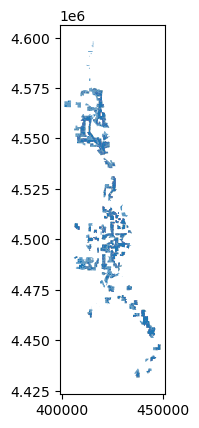

In [ ]:
# Perform the intersection of the first two GeoDataFrames
gdf_stops_flu_50 = gpd.overlay(centers_taz_with_nearest_stop_gdf, gdf_future_land_use_2050_filtered, how='union')

# Calculate the area in square meters
gdf_stops_flu_50['sqmu'] = gdf_stops_flu_50.geometry.area

# Convert the area to acres
gdf_stops_flu_50['acresu'] = gdf_stops_flu_50['sqmu'] / 4046.85642

# fill null TAZID with value from FLU
gdf_stops_flu_50['TAZID'].fillna(gdf_stops_flu_50['TAZID_900'], inplace=True)

gdf_stops_flu_50[['N', 'project_id']] = gdf_stops_flu_50[['N', 'project_id']].fillna(-1)

# The final_intersection GeoDataFrame now contains the intersection of all three GeoDataFrames
display(gdf_stops_flu_50)
gdf_stops_flu_50.plot()

<AxesSubplot:>

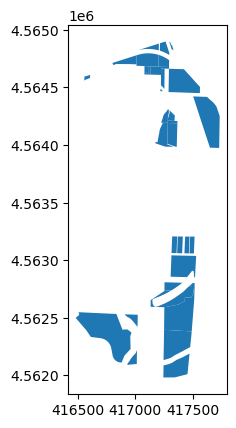

In [ ]:
gdf_stops_flu_50[(gdf_stops_flu_50['TAZID'].isin([367,388])) & (gdf_stops_flu_50['EMP']==True)].plot()

In [ ]:
# Step 1: Calculate the total sum of acresu for each TAZID
total_acresu_by_tazid = gdf_stops_flu_50[gdf_stops_flu_50['HH'] == True].groupby('TAZID', as_index=False).agg(total_acresu=('acresu', 'sum'))

df_stops_flu_50_HH_areas = gdf_stops_flu_50.copy()

df_stops_flu_50_HH_areas['variable'] = 'TOTHH'

# Step 2: Group by TAZID, N, and project_id and calculate the sum of acresu for HH==True
df_stops_flu_50_HH_areas = df_stops_flu_50_HH_areas[df_stops_flu_50_HH_areas['HH'] == True].groupby(['TAZID', 'N', 'project_id', 'variable'], as_index=False).agg(acresu_sum=('acresu', 'sum'))

# Step 3: Merge the total sum back to the grouped DataFrame
df_stops_flu_50_HH_areas = df_stops_flu_50_HH_areas.merge(total_acresu_by_tazid, on='TAZID', how='left')

# Step 4: Perform the division
df_stops_flu_50_HH_areas['ratio_of_taz'] = df_stops_flu_50_HH_areas['acresu_sum'] / df_stops_flu_50_HH_areas['total_acresu']

# Display the resulting DataFrame
df_stops_flu_50_HH_areas

,TAZID,N,project_id,variable,acresu_sum,total_acresu,ratio_of_taz
0,170.0,-1.0,-1.0,TOTHH,343.900925,349.168196,0.984915
1,170.0,15189.0,130.0,TOTHH,5.267270,349.168196,0.015085
2,171.0,-1.0,-1.0,TOTHH,608.349337,613.597697,0.991447
3,171.0,15189.0,130.0,TOTHH,5.248360,613.597697,0.008553
4,174.0,-1.0,-1.0,TOTHH,139.792244,149.324806,0.936162
...,...,...,...,...,...,...,...
1917,3405.0,65624.0,5.0,TOTHH,5.208681,54.975351,0.094746
1918,3406.0,-1.0,-1.0,TOTHH,61.863063,74.410975,0.831370
1919,3406.0,65631.0,5.0,TOTHH,12.547911,74.410975,0.168630
1920,3407.0,-1.0,-1.0,TOTHH,269.948892,274.684684,0.982759


In [ ]:
# Step 1: Calculate the total sum of area_acresu for each TAZID
total_acres_flu_by_tazid_50_emp = gdf_stops_flu_50[gdf_stops_flu_50['EMP'] == True].groupby('TAZID', as_index=False).agg(total_acresu=('acresu', 'sum'))

df_stops_flu_50_EMP_areas = gdf_stops_flu_50.copy()

df_stops_flu_50_EMP_areas['variable'] = 'TOTEMP'

# Step 2: Group by TAZID, N, and project_id and calculate the sum of acresu for EMP==True
df_stops_flu_50_EMP_areas = df_stops_flu_50_EMP_areas[df_stops_flu_50_EMP_areas['EMP'] == True].groupby(['TAZID', 'N', 'project_id', 'variable'], as_index=False).agg(acresu_sum=('acresu', 'sum'))

# Step 3: Merge the total sum back to the grouped DataFrame
df_stops_flu_50_EMP_areas = df_stops_flu_50_EMP_areas.merge(total_acres_flu_by_tazid_50_emp, on='TAZID', how='left')

# Step 4: Perform the division
df_stops_flu_50_EMP_areas['ratio_of_taz'] = df_stops_flu_50_EMP_areas['acresu_sum'] / df_stops_flu_50_EMP_areas['total_acresu']

# Display the resulting DataFrame
df_stops_flu_50_EMP_areas

,TAZID,N,project_id,variable,acresu_sum,total_acresu,ratio_of_taz
0,170.0,-1.0,-1.0,TOTEMP,116.983990,120.984208,0.966936
1,170.0,15189.0,130.0,TOTEMP,4.000218,120.984208,0.033064
2,171.0,15189.0,130.0,TOTEMP,1.641890,1.641890,1.000000
3,174.0,-1.0,-1.0,TOTEMP,2.197513,11.730075,0.187340
4,174.0,15186.0,130.0,TOTEMP,9.532562,11.730075,0.812660
...,...,...,...,...,...,...,...
1901,3353.0,71081.0,5.0,TOTEMP,0.066747,12.630763,0.005284
1902,3364.0,-1.0,-1.0,TOTEMP,11.351353,12.491127,0.908753
1903,3364.0,71081.0,5.0,TOTEMP,1.139774,12.491127,0.091247
1904,3365.0,65494.0,114.0,TOTEMP,21.474240,21.474240,1.000000


In [ ]:
df_stops_flu_50_areas = pd.concat([df_stops_flu_50_HH_areas, df_stops_flu_50_EMP_areas])
df_stops_flu_50_areas = df_stops_flu_50_areas[['TAZID','N','project_id','variable','ratio_of_taz']]
df_stops_flu_50_areas

,TAZID,N,project_id,variable,ratio_of_taz
0,170.0,-1.0,-1.0,TOTHH,0.984915
1,170.0,15189.0,130.0,TOTHH,0.015085
2,171.0,-1.0,-1.0,TOTHH,0.991447
3,171.0,15189.0,130.0,TOTHH,0.008553
4,174.0,-1.0,-1.0,TOTHH,0.936162
...,...,...,...,...,...
1901,3353.0,71081.0,5.0,TOTEMP,0.005284
1902,3364.0,-1.0,-1.0,TOTEMP,0.908753
1903,3364.0,71081.0,5.0,TOTEMP,0.091247
1904,3365.0,65494.0,114.0,TOTEMP,1.000000


In [ ]:
df_stops_flu_50_areas

,TAZID,N,project_id,variable,ratio_of_taz
0,170.0,-1.0,-1.0,TOTHH,0.984915
1,170.0,15189.0,130.0,TOTHH,0.015085
2,171.0,-1.0,-1.0,TOTHH,0.991447
3,171.0,15189.0,130.0,TOTHH,0.008553
4,174.0,-1.0,-1.0,TOTHH,0.936162
...,...,...,...,...,...
1901,3353.0,71081.0,5.0,TOTEMP,0.005284
1902,3364.0,-1.0,-1.0,TOTEMP,0.908753
1903,3364.0,71081.0,5.0,TOTEMP,0.091247
1904,3365.0,65494.0,114.0,TOTEMP,1.000000


In [ ]:
df_stops_flu_50_areas[df_stops_flu_50_areas['TAZID']==165]

,TAZID,N,project_id,variable,ratio_of_taz


In [ ]:
df_stops_flu_50_areas_pivot = df_stops_flu_50_areas.pivot(index=['TAZID','N','project_id'], columns='variable', values='ratio_of_taz')
df_stops_flu_50_areas_pivot.reset_index(inplace=True)
df_stops_flu_50_areas_pivot.fillna(0,inplace=True)
df_stops_flu_50_areas_pivot.to_csv('intermediate/parameter-area-ratio-of-taz.csv', index=False)
print('Exported!')

Exported!


In [ ]:
import geopandas as gpd

# Dissolve based on 'dev_status' attribute
dissolved_2023 = gdf_future_land_use_2023_filtered.dissolve(by=['dev_status'])

# Explode MultiPolygons into individual Polygons
dissolved_2023 = dissolved_2023.explode(index_parts=True)

# Reset index to clean up the GeoDataFrame
dissolved_2023 = dissolved_2023.reset_index()

# Project to UTM Zone 12N (EPSG:26912) for accurate simplification
dissolved_2023 = dissolved_2023.to_crs(epsg=26912)

# Simplify polygons with a specified tolerance (adjust tolerance as needed)
tolerance = 10  # meters
dissolved_2023['geometry'] = dissolved_2023['geometry'].simplify(tolerance, preserve_topology=True)

# Reproject back to WGS 84 (EPSG:4326) for export
dissolved_2023 = dissolved_2023.to_crs(epsg=4326)

# Export to GeoJSON
dissolved_2023[['dev_status', 'geometry']].to_file('_site/data/future_land_use_2023_filtered.geojson', driver='GeoJSON')


In [ ]:
dissolved_2023[dissolved_2023['dev_status']=='no_change']

,dev_status,level_1,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,...,mixed,other,year,no_build,sqmf,acresf,acresf_nb,acresf_nc,acresf_ch,geometry
12711,no_change,0,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-112.10276 40.56287, -112.10276 40.5..."
12712,no_change,1,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-112.10389 40.56419, -112.10389 40.5..."
12713,no_change,2,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-112.10189 40.56422, -112.10168 40.5..."
12714,no_change,3,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-112.10322 40.56459, -112.10336 40.5..."
12715,no_change,4,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-112.10315 40.56435, -112.10315 40.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25291,no_change,12580,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-111.61036 40.17868, -111.60937 40.1..."
25292,no_change,12581,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-111.60325 40.17846, -111.60358 40.1..."
25293,no_change,12582,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-111.60325 40.17861, -111.60358 40.1..."
25294,no_change,12583,0,206.0,0.0,713.0,4.0,0.5,1.0,1.0,...,0.0,0.0,2019.0,0.0,3019.398775,0.74611,0.0,0.74611,0.0,"POLYGON ((-111.60411 40.17886, -111.60411 40.1..."
